<a href="https://colab.research.google.com/github/RJL08/Sistemas-de-aprendizaje-autm-tico/blob/main/K_MEANS_ut5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [3]:
# cargamos el data set iris
from sklearn.datasets import load_iris
iris = load_iris()
# para aprendizaje no supervissdo
X=iris.data
# longuitud columnas
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# preprocesar
# escalamos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

In [6]:
# metodo del codo para ver mejor valor de k
from sklearn.cluster import KMeans
wcss=[]
k_values= range(1,12)
for k in k_values:
    kmeans=KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10,
        max_iter=300
        )

    # entrenamos con los doatos escalados
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/tmp/ipython-input-781685460.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(k_values,wcss,'bx-',marker='o')


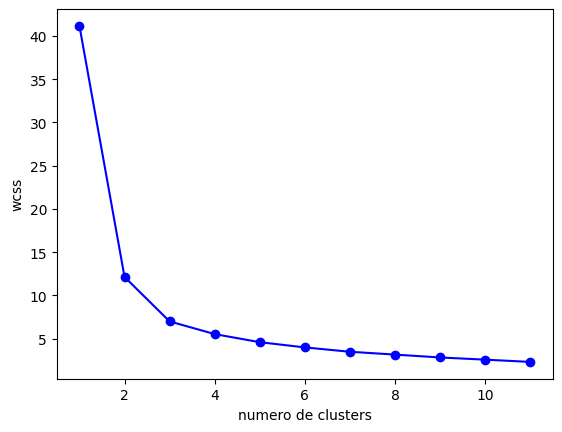

In [8]:
#Grafica de los resultados
plt.plot(figsize = ( 10,5))
plt.plot(k_values,wcss,'bx-',marker='o')
plt.xlabel('numero de clusters')
plt.ylabel('wcss')
plt.show()

In [9]:
# aplicamos kmeans con k optimo
optimal_k= 3
kmeans_final=KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=10,
    max_iter=300
)
clusters=kmeans_final.fit(X_scaled)


In [22]:
# visualizamos , añadimos la etiqueta cluster al dataframe original para viualizarlo
df_iris=pd.DataFrame(X_scaled,columns=iris.feature_names)
df_iris['cluster']=kmeans_final.labels_
print(df_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0             0.222222          0.625000           0.067797          0.041667   
1             0.166667          0.416667           0.067797          0.041667   
2             0.111111          0.500000           0.050847          0.041667   
3             0.083333          0.458333           0.084746          0.041667   
4             0.194444          0.666667           0.067797          0.041667   
..                 ...               ...                ...               ...   
145           0.666667          0.416667           0.711864          0.916667   
146           0.555556          0.208333           0.677966          0.750000   
147           0.611111          0.416667           0.711864          0.791667   
148           0.527778          0.583333           0.745763          0.916667   
149           0.444444          0.416667           0.694915          0.708333   

     cluster  
0          0

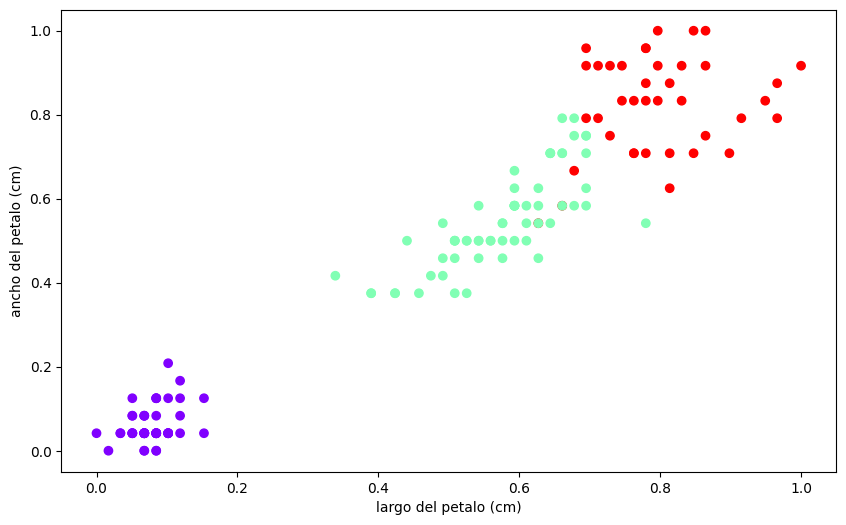

In [23]:
# visualizamos los resultados del los clusters
# primero los petalos
plt.figure(figsize=(10,6))
plt.scatter(df_iris['petal length (cm)'],df_iris['petal width (cm)'],c=df_iris['cluster'],cmap='rainbow')
plt.xlabel('largo del petalo (cm)')
plt.ylabel('ancho del petalo (cm)')
plt.show()

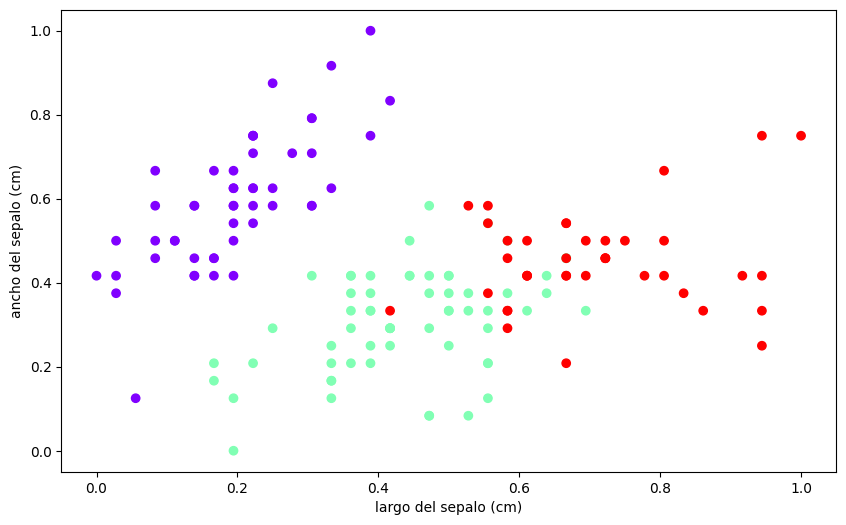

In [24]:
# visualizamos los resultados del los clusters
# primero los sepalo
plt.figure(figsize=(10,6))
plt.scatter(df_iris['sepal length (cm)'],df_iris['sepal width (cm)'],c=df_iris['cluster'],cmap='rainbow')
plt.xlabel('largo del sepalo (cm)')
plt.ylabel('ancho del sepalo (cm)')
plt.show()

In [28]:
# numero de centroides 3 con dimension de 4
print(kmeans_final.cluster_centers_.shape)

(3, 4)


In [29]:
# realizamos una reduccion
X=df_iris[['petal length (cm)', 'petal width (cm)']]

In [30]:
kmeans_centroide =KMeans(
    n_clusters=3,
    random_state=42
)

In [39]:
# hacemos el fit
df_iris = kmeans_centroide.fit(X)

In [40]:
print(kmeans_centroide.cluster_centers_.shape)

(3, 2)


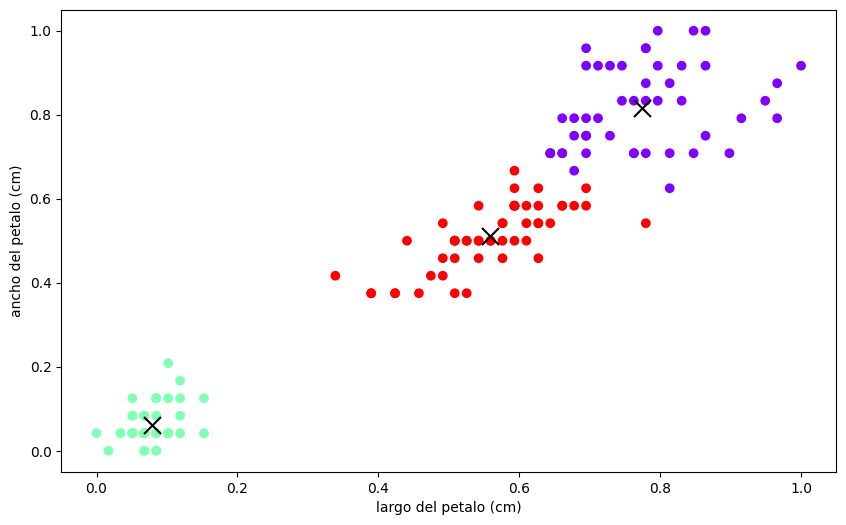

In [43]:
# representamos los centroides
# primero los petalos
plt.figure(figsize=(10,6))

# Get the cluster labels for the reduced data X
cluster_labels_for_X = kmeans_centroide.fit_predict(X)

# Use X for plotting and cluster_labels_for_X for coloring
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=cluster_labels_for_X, cmap='rainbow')

centroids = kmeans_centroide.cluster_centers_
plt.scatter(
    centroids[:, 0],# longitud del petalo
    centroids[:, 1],# ancho del petalo
    c = 'black',
    marker='x',
    s=150,
    label = 'Centroides'

)
plt.xlabel('largo del petalo (cm)')
plt.ylabel('ancho del petalo (cm)')
plt.show()

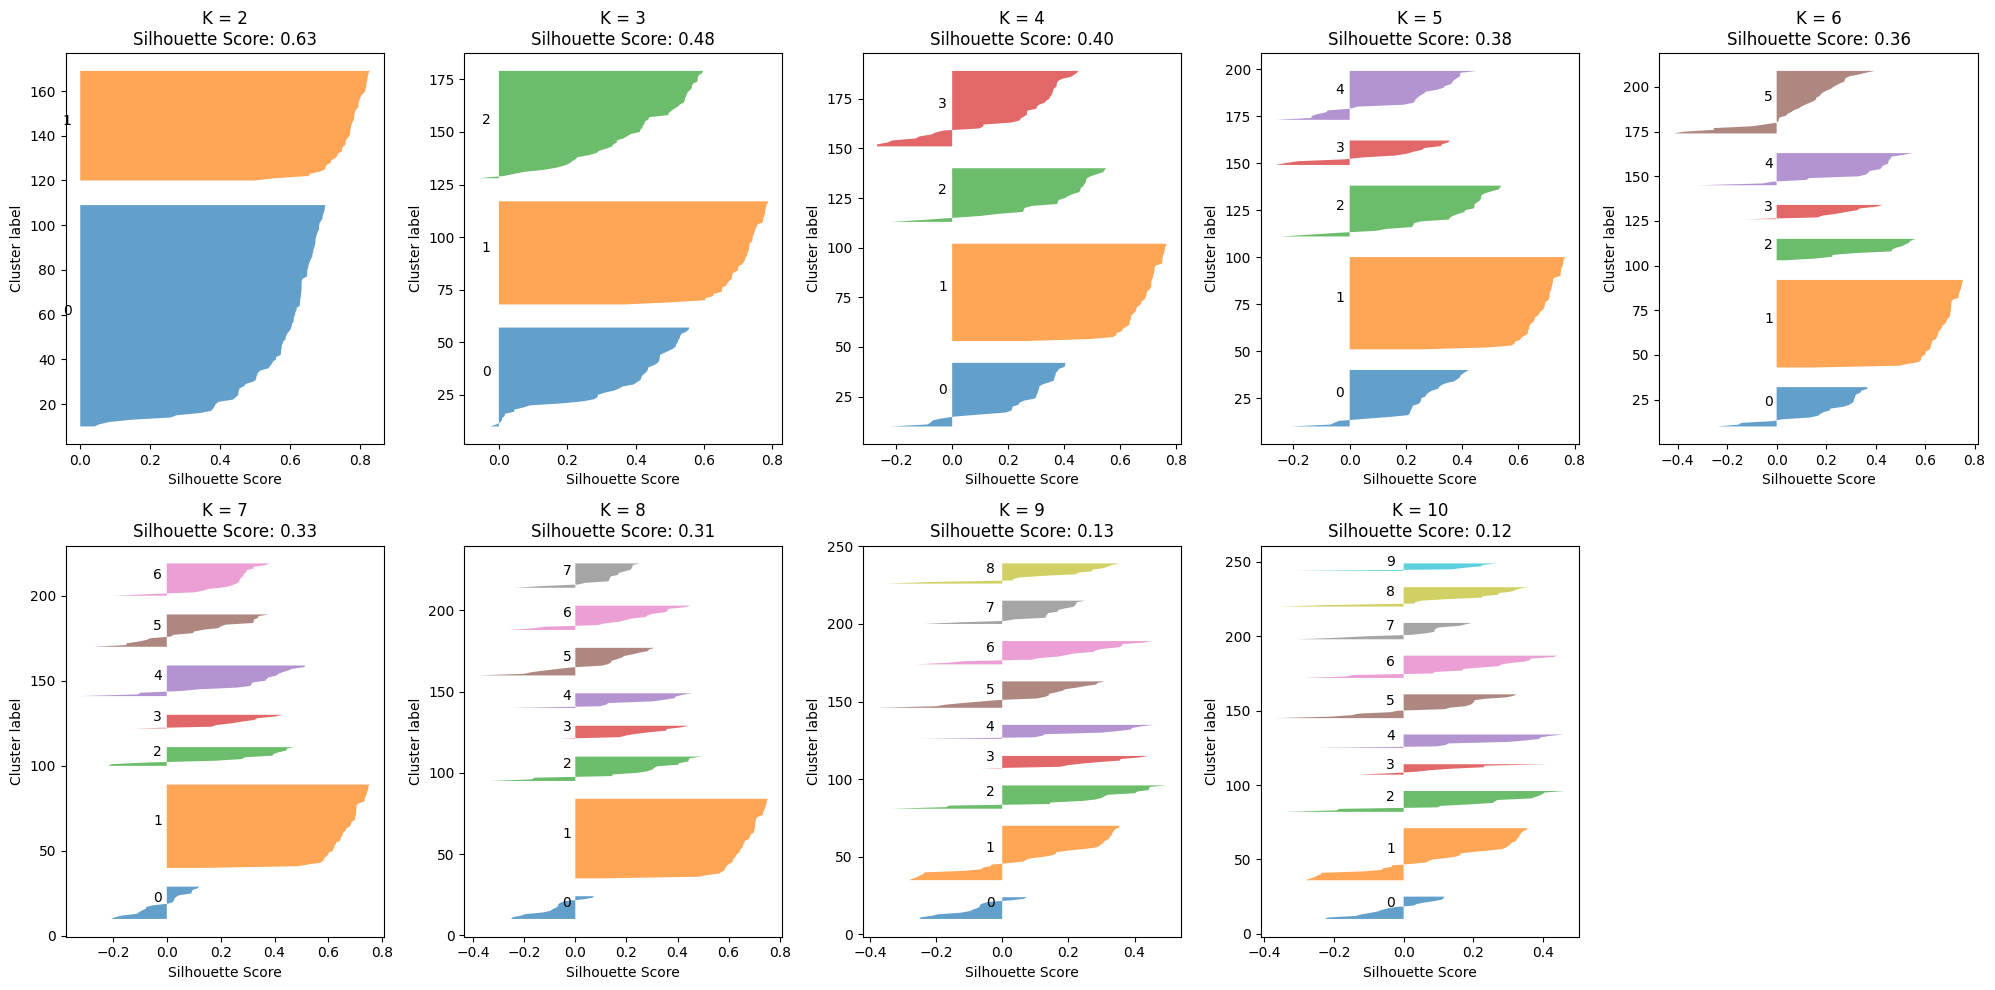

In [51]:
# metodo de la silueta
from sklearn.metrics import silhouette_score, silhouette_samples

# Lista de valores de K a probar
k_values = range(2, 11)

# Inicializar la figura
plt.figure(figsize=(20, 10))

# Calcular y graficar la métrica de silueta para diferentes valores de K
silhouette_scores = []
for i, k in enumerate(k_values, start=1):
    # Crear el modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Predecir las etiquetas del clúster
    cluster_labels = kmeans.fit_predict(X) # Utilizar datos estandarizados

    # Calcular la métrica de silueta
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Graficar la métrica de silueta para este valor de K
    plt.subplot(2, 5, i)
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
    y_lower = 10
    for j in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        ith_cluster_silhouette_values.sort()
        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    plt.title(f'K = {k}\nSilhouette Score: {silhouette_avg:.2f}')
    plt.xlabel('Silhouette Score')
    plt.ylabel('Cluster label')

plt.tight_layout()
plt.show()